About this file:

Car Evaluation Database was derived from a simple hierarchical decision model originally developed for the demonstration of DEX, M. Bohanec, V. Rajkovic: Expert system for decision making. Sistemica 1(1), pp. 145-157, 1990.). The model evaluates cars according to the following concept structure:

CAR car acceptability
. PRICE overall price
. . buying buying price
. . maint price of the maintenance
. TECH technical characteristics
. . COMFORT comfort
. . . doors number of doors
. . . persons capacity in terms of persons to carry
. . . lug_boot the size of luggage boot
. . safety estimated safety of the car

Input attributes are printed in lowercase. Besides the target concept (CAR), the model includes three intermediate concepts: PRICE, TECH, COMFORT. Every concept is in the original model related to its lower level descendants by a set of examples (for these examples sets see [Web Link]).

The Car Evaluation Database contains examples with the structural information removed, i.e., directly relates CAR to the six input attributes: buying, maint, doors, persons, lug_boot, safety.

Because of known underlying concept structure, this database may be particularly useful for testing constructive induction and structure discovery methods.

Attribute Information:

Class Values:

unacc, acc, good, vgood

Attributes:

buying: vhigh, high, med, low.
maint: vhigh, high, med, low.
doors: 2, 3, 4, 5more.
persons: 2, 4, more.
lug_boot: small, med, big.
safety: low, med, high.

## Import libraries

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import tree

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Import Dataset

In [4]:
df = pd.read_csv('car_evaluation.csv',header=None)

## Exploratory data analysis

In [5]:
# preview the dataset

df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


We can see that the dataset does not have proper column names. We will add it as follows.

In [6]:
# rename the column

col_names = ['buying','maint','doors','persons','lug_boot','safety','class']
df.columns = col_names

# let's again preview the dataset

df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [7]:
# view the dimension of the dataset

df.shape

(1728, 7)

We can see that there are 1728 instances and 7 variables in the data set.

In [8]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [9]:
# check for the missing values in the dataset

df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [10]:
# frequency distribution of values in variables

for i in col_names:
    print('Column_Name :',i)
    print(df[i].value_counts(),'\n')

Column_Name : buying
vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64 

Column_Name : maint
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64 

Column_Name : doors
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64 

Column_Name : persons
2       576
4       576
more    576
Name: persons, dtype: int64 

Column_Name : lug_boot
small    576
med      576
big      576
Name: lug_boot, dtype: int64 

Column_Name : safety
low     576
med     576
high    576
Name: safety, dtype: int64 

Column_Name : class
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64 



In [22]:
# declare feature vector and target variable

X = df.drop('class',axis=1)
y = df['class']

In [23]:
X.head(2)

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med


In [24]:
y.head(2)

0    unacc
1    unacc
Name: class, dtype: object

In [25]:
# check the shape of X and y
X.shape, y.shape

((1728, 6), (1728,))

In [26]:
# split the data into Train and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [27]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1209, 6), (519, 6))

## Feature Engineering

In [28]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [37]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1178,med,med,5more,4,big,high
585,high,high,3,more,small,low
1552,low,med,3,4,med,med
1169,med,med,5more,2,big,high
1033,med,high,4,2,big,med


We can see that all the variables are ordinal categorical data type.
So we will encode the variables with Ordinal Encording.

In [39]:
encorder = OrdinalEncoder(categories=
                          [['low','med','high','vhigh'],
                           ['low','med','high','vhigh'],
                         ['2','3','4','5more'],
                         ['2','4','more'],
                         ['small','med','big'],
                          ['low','med','high']]
                         )

encorder.fit(X_train)


OrdinalEncoder(categories=[['low', 'med', 'high', 'vhigh'],
                           ['low', 'med', 'high', 'vhigh'],
                           ['2', '3', '4', '5more'], ['2', '4', 'more'],
                           ['small', 'med', 'big'], ['low', 'med', 'high']])

In [41]:
X_train = encorder.transform(X_train)
X_test = encorder.transform(X_test)

In [43]:
X_train[0:5]

array([[1., 1., 3., 1., 2., 2.],
       [2., 2., 1., 2., 0., 0.],
       [0., 1., 1., 1., 1., 1.],
       [1., 1., 3., 0., 2., 2.],
       [1., 2., 2., 0., 2., 1.]])

In [45]:
# apply label encorder on Target variable

lbl_enc = LabelEncoder()

y_train = lbl_enc.fit_transform(y_train)
y_test = lbl_enc.transform(y_test)

## Decision Tree Classifier with criterion gini index

In [59]:
model_dt1 = DecisionTreeClassifier(criterion='gini',max_depth=5, random_state=0)

model_dt1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [60]:
y_pred1 = model_dt1.predict(X_test)

In [61]:
# Check the test set accuracy

print('accuracy score with criterion gini index: {:.4f}'.format(accuracy_score(y_test,y_pred1)))

accuracy score with criterion gini index: 0.8459


In [73]:
print(confusion_matrix(y_test,y_pred1))

[[ 91  11  16   0]
 [  8   5   0   6]
 [ 22   1 335   0]
 [ 16   0   0   8]]


In [74]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.66      0.77      0.71       118
           1       0.29      0.26      0.28        19
           2       0.95      0.94      0.94       358
           3       0.57      0.33      0.42        24

    accuracy                           0.85       519
   macro avg       0.62      0.58      0.59       519
weighted avg       0.85      0.85      0.84       519



In [62]:
# Check the train set accuracy

y_pred_tr1 = model_dt1.predict(X_train)

print('accuracy score with criterion gini index: {:.4f}'.format(accuracy_score(y_train,y_pred_tr1)))

accuracy score with criterion gini index: 0.8743


## Check for overfitting and underfitting

In [53]:
print('Training set score: {:.4f}'.format(model_dt1.score(X_train,y_train)))
print('Testing set score: {:.4f}'.format(model_dt1.score(X_test,y_test)))

Training set score: 0.7916
Testing set score: 0.7919


## Visualize decision tree

[Text(313.875, 348.81, 'X[5] <= 0.5\ngini = 0.452\nsamples = 1209\nvalue = [266, 50, 852, 41]'),
 Text(261.5625, 285.39, 'gini = 0.0\nsamples = 407\nvalue = [0, 0, 407, 0]'),
 Text(366.1875, 285.39, 'X[3] <= 0.5\ngini = 0.576\nsamples = 802\nvalue = [266, 50, 445, 41]'),
 Text(313.875, 221.97, 'gini = 0.0\nsamples = 260\nvalue = [0, 0, 260, 0]'),
 Text(418.5, 221.97, 'X[0] <= 1.5\ngini = 0.628\nsamples = 542\nvalue = [266, 50, 185, 41]'),
 Text(209.25, 158.55, 'X[1] <= 0.5\ngini = 0.646\nsamples = 264\nvalue = [139, 50, 34, 41]'),
 Text(104.625, 95.13, 'X[5] <= 1.5\ngini = 0.612\nsamples = 65\nvalue = [9, 35, 3, 18]'),
 Text(52.3125, 31.710000000000036, 'gini = 0.456\nsamples = 31\nvalue = [9, 21, 1, 0]'),
 Text(156.9375, 31.710000000000036, 'gini = 0.547\nsamples = 34\nvalue = [0, 14, 2, 18]'),
 Text(313.875, 95.13, 'X[1] <= 1.5\ngini = 0.53\nsamples = 199\nvalue = [130, 15, 31, 23]'),
 Text(261.5625, 31.710000000000036, 'gini = 0.65\nsamples = 64\nvalue = [32, 15, 4, 13]'),
 Text(366

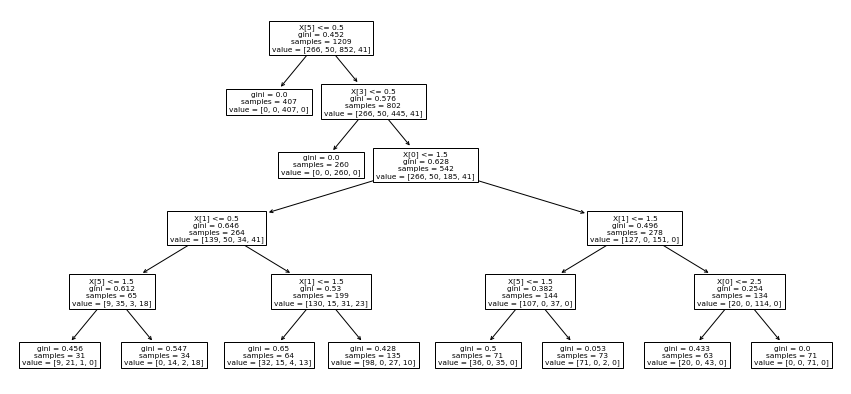

In [65]:
plt.figure(figsize=(15,7))

tree.plot_tree(model_dt1.fit(X_train,y_train))

## Decision Tree Classifier with criterion entropy

In [66]:
model_dt2 = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)

In [67]:
model_dt2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [68]:
y_pred2 = model_dt2.predict(X_test)

# Check the test set accuracy

print('accuracy score with criterion entropy: {:.4f}'.format(accuracy_score(y_test,y_pred2)))

accuracy score with criterion entropy: 0.8690


In [76]:
print(confusion_matrix(y_test,y_pred2))

[[ 95   0  16   7]
 [ 10   0   0   9]
 [ 23   0 335   0]
 [  3   0   0  21]]


In [77]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.73      0.81      0.76       118
           1       0.00      0.00      0.00        19
           2       0.95      0.94      0.94       358
           3       0.57      0.88      0.69        24

    accuracy                           0.87       519
   macro avg       0.56      0.65      0.60       519
weighted avg       0.85      0.87      0.86       519



In [69]:
# Check the train set accuracy

y_pred_tr2 = model_dt2.predict(X_train)

print('accuracy score with criterion entropy: {:.4f}'.format(accuracy_score(y_train,y_pred_tr2)))

accuracy score with criterion entropy: 0.8726


## Check for overfitting and underfitting

In [71]:
print('Training set score: {:.4f}'.format(model_dt2.score(X_train,y_train)))
print('Testing set score: {:.4f}'.format(model_dt2.score(X_test,y_test)))

Training set score: 0.8726
Testing set score: 0.8690


[Text(313.875, 348.81, 'X[5] <= 0.5\nentropy = 1.192\nsamples = 1209\nvalue = [266, 50, 852, 41]'),
 Text(261.5625, 285.39, 'entropy = 0.0\nsamples = 407\nvalue = [0, 0, 407, 0]'),
 Text(366.1875, 285.39, 'X[3] <= 0.5\nentropy = 1.469\nsamples = 802\nvalue = [266, 50, 445, 41]'),
 Text(313.875, 221.97, 'entropy = 0.0\nsamples = 260\nvalue = [0, 0, 260, 0]'),
 Text(418.5, 221.97, 'X[0] <= 1.5\nentropy = 1.632\nsamples = 542\nvalue = [266, 50, 185, 41]'),
 Text(209.25, 158.55, 'X[1] <= 1.5\nentropy = 1.74\nsamples = 264\nvalue = [139, 50, 34, 41]'),
 Text(104.625, 95.13, 'X[5] <= 1.5\nentropy = 1.778\nsamples = 129\nvalue = [41, 50, 7, 31]'),
 Text(52.3125, 31.710000000000036, 'entropy = 1.2\nsamples = 70\nvalue = [38, 29, 3, 0]'),
 Text(156.9375, 31.710000000000036, 'entropy = 1.5\nsamples = 59\nvalue = [3, 21, 4, 31]'),
 Text(313.875, 95.13, 'X[5] <= 1.5\nentropy = 1.078\nsamples = 135\nvalue = [98, 0, 27, 10]'),
 Text(261.5625, 31.710000000000036, 'entropy = 0.959\nsamples = 63\nvalue

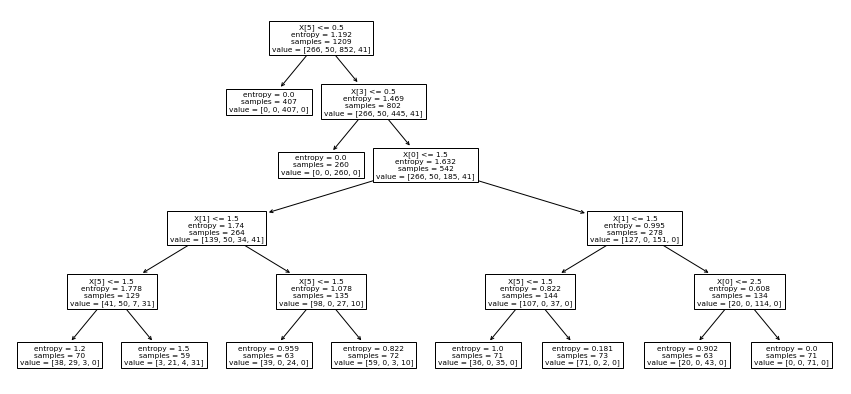

In [72]:
plt.figure(figsize=(15,7))

tree.plot_tree(model_dt2.fit(X_train,y_train))

## Results and Conclusion

In this project, I build a Decision-Tree Classifier model to predict the safety of the car. I build two models, one with criterion gini index and another one with criterion entropy. The model yields a very good performance as indicated by the model accuracy in entropy case which was found to be 0.8690.

In the model with criterion gini index, the training-set accuracy score is 0.7916 while the test-set accuracy to be 0.7919. These two values are quite comparable. So, there is no sign of overfitting.

Similarly, in the model with criterion entropy, the training-set accuracy score is 0.8726 while the test-set accuracy to be 0.8690.We get the same values as in the case with criterion gini. So, there is no sign of overfitting.

So the model perfomance is better in case of entropy criterion as the confusion matrix and classification report yields very good model performance.